In [116]:
import numpy as np
import pandas as pd
import numpy.random as random
import scipy.fft as sfft
sys.path.insert(0, '../../Libraries')
import JacksonsTSPackage as jts
from statsmodels.tsa.api import VAR

In [117]:
def mul_ten_and_mat(tensor, matrix):
    
    matrix_shape = matrix.shape
    ten_length = len(tensor)
    ten_sqr = ten_length*ten_length
    block_matrix = np.zeros((ten_sqr, ten_sqr))

    # Makes the block vector
    trans_vector = sfft.dct(matrix, axis=1)
    block_vector = trans_vector.transpose().reshape(ten_sqr)

    # Makes the block matrix
    transform_tensor = sfft.dct(tensor, axis=0)
    for i in range(ten_length):
        c = i * 3
        block_matrix[c:c+3,c:c+3] = transform_tensor[i]

    result_block_vector = np.matmul(block_matrix, block_vector)
    result_trans_matrix = result_block_vector.reshape(matrix_shape).transpose()
    result_matrix = sfft.idct(result_trans_matrix, axis=1)

    return result_matrix

N = 2000
A = np.random.uniform(-0.3, 0.3, size=(3, 3, 3))

T = np.array([
        [1, -1, 1],
        [-1, 1, 1],
        [1, 1, -1]
    ])

tmp = np.array(
    [
        [0.1, 0.2, 0.3],
        [0.4, 0.5, 0.6],
        [0.7, 0.8, 0.9]
    ])

data_tensor = np.zeros((N, 3, 3))
data_tensor[0] = tmp
for i in range(1, N):
    data_tensor[i] = mul_ten_and_mat(A, data_tensor[i-1]) + random.uniform(-1, 1, (3, 3))# + T * i**2 / 500000
data_tensor.shape

(2000, 3, 3)

In [118]:
A

array([[[ 0.21949206, -0.27076384, -0.25730938],
        [-0.10170631,  0.2853936 , -0.14622588],
        [-0.29129279,  0.24298742, -0.11160737]],

       [[ 0.00856005, -0.2519335 , -0.06792785],
        [ 0.03626385, -0.14956655, -0.23548162],
        [ 0.25393635, -0.06645744,  0.24252729]],

       [[-0.28387931,  0.2220574 ,  0.04868166],
        [-0.28469113,  0.27649007,  0.03205331],
        [-0.13118589,  0.17093646,  0.0592419 ]]])

In [119]:
vectorized = pd.DataFrame(jts.tensor_to_vector(data_tensor))
vectorized

,0,1,2,3,4,5,6,7,8
0,0.100000,0.400000,0.700000,0.200000,0.500000,0.800000,0.300000,0.600000,0.900000
1,-1.614923,-0.896316,1.549126,-1.744298,0.007165,1.279051,-0.778813,-0.233942,0.863966
2,-0.517444,-0.703554,0.956614,0.619508,0.729944,0.992771,0.582557,0.385768,-0.094170
3,-0.734089,-0.146236,0.922172,0.261722,0.565138,-0.659280,-0.804506,-1.032374,1.018581
4,-0.122209,0.652877,-0.129198,-0.154357,-1.062963,-0.433966,1.061704,-0.842330,0.558666
...,...,...,...,...,...,...,...,...,...
1995,-0.187433,-0.319496,0.350919,1.561618,1.564868,-0.110801,-0.465175,0.484727,0.858143
1996,0.607161,0.958837,0.690991,0.583790,0.201198,0.019613,-1.986613,0.693842,1.222114
1997,0.527116,1.808239,1.656337,-0.679593,-1.684441,-0.678748,-0.793967,-0.595455,1.573311
1998,-0.957808,0.350611,-0.039003,-1.852016,-1.914191,0.194556,-0.091594,0.598515,-0.337236


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

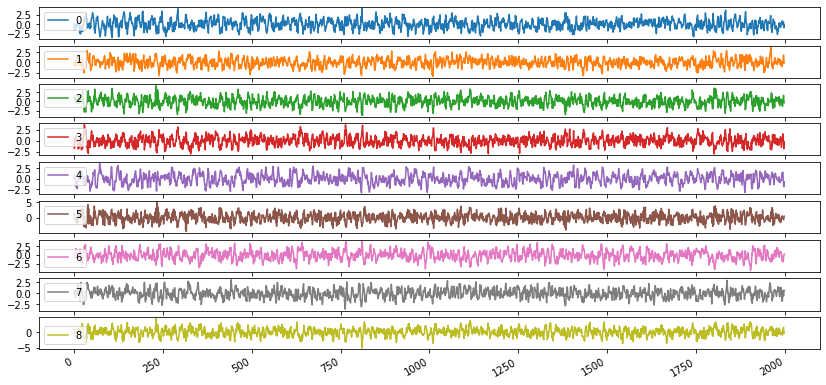

In [120]:
vectorized.plot(figsize = (14, 7), subplots = True)

In [99]:
N_train = 1800
N_test = N - N_train
print(f"N: {N}")
print(f"N_train: {N_train}")
print(f"N_test: {N_test}")

N: 2000
N_train: 1800
N_test: 200


In [121]:
train_tensor = jts.extract_train_tensor(data_tensor, N_train)
test_tensor = jts.extract_test_tensor(data_tensor, N_train, N_test)

In [122]:
train_tensor

array([[[ 0.1       ,  0.2       ,  0.3       ],
        [ 0.4       ,  0.5       ,  0.6       ],
        [ 0.7       ,  0.8       ,  0.9       ]],

       [[-1.61492307, -1.74429758, -0.77881304],
        [-0.89631638,  0.00716533, -0.23394155],
        [ 1.54912611,  1.27905052,  0.86396562]],

       [[-0.51744366,  0.619508  ,  0.58255736],
        [-0.70355378,  0.72994351,  0.38576786],
        [ 0.9566142 ,  0.99277114, -0.0941696 ]],

       ...,

       [[-0.58434939,  1.88405791,  0.05119757],
        [-1.26753452, -0.88415744,  1.04306   ],
        [-2.0068414 , -0.04363228, -0.82923635]],

       [[ 2.85222433, -0.2305693 , -0.03955174],
        [ 1.42816071, -0.19444199,  0.78314885],
        [ 1.17893821, -2.77989108,  1.0898861 ]],

       [[ 0.30345502, -0.83365605, -2.15384655],
        [ 1.13568352, -0.71150353,  0.69006403],
        [-1.86767851,  1.17586467, -1.32539743]]])

In [123]:
train_dft = jts.apply_dct_to_tensor(train_tensor)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

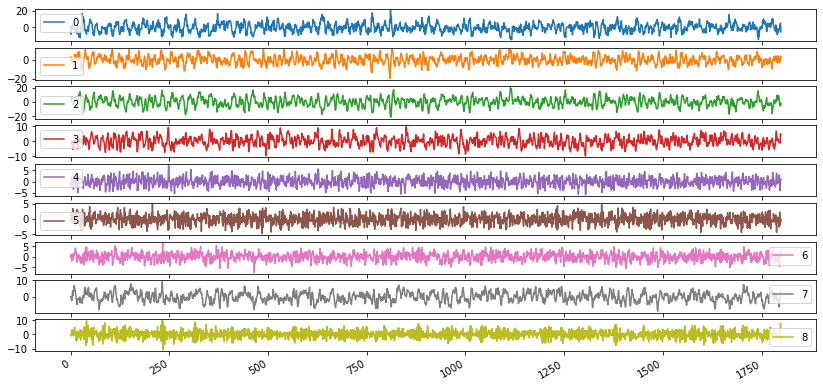

In [124]:
vectorized = pd.DataFrame(jts.tensor_to_vector(train_dft))
vectorized.plot(figsize = (14, 7), subplots = True)

In [125]:
train_model_sets = jts.split_cols_into_model_sets(train_dft, N_train)
test_model_sets = jts.split_cols_into_model_sets(test_tensor, N_test)

In [126]:
result_model_sets = np.empty((3, N_test, 3))

In [127]:
models = []
for i in range(3):
    train_df = pd.DataFrame(train_model_sets[i])
    train_df.index = pd.DatetimeIndex(train_df.index).to_period('M')
    train_diff = train_df #.diff().dropna()
    test_df = pd.DataFrame(test_model_sets[i])
    model = VAR(train_diff)
    fit = model.fit(1)
    models.append(fit)
    
    test_df.columns = test_df.columns[:].astype(str)
    results = jts.forecast(fit, train_diff, test_df, N_test, calc_conf = False)
    result_model_sets[i] = results #jts.invert_diff_transformation(results, train_df) 
result_model_sets

array([[[ 1.32503676,  8.34306869,  1.74071736],
        [-6.14136486,  4.94290308,  6.12229239],
        [-5.74284528,  4.12864019,  7.89321325],
        ...,
        [-0.09125127, -0.09047634,  0.14707174],
        [-0.09125127, -0.09047634,  0.14707174],
        [-0.09125127, -0.09047634,  0.14707174]],

       [[ 3.6374025 ,  1.69704909, -0.87092146],
        [ 2.21909792,  1.45652296, -0.58162079],
        [ 1.01449898,  0.88550966, -0.29277595],
        ...,
        [ 0.1935612 ,  0.0469529 , -0.06160072],
        [ 0.1935612 ,  0.0469529 , -0.06160072],
        [ 0.1935612 ,  0.0469529 , -0.06160072]],

       [[ 1.90262187,  0.89359518,  4.98421677],
        [-0.16578304,  1.7313207 , -3.85899375],
        [ 1.08686614,  0.1633139 ,  3.2251566 ],
        ...,
        [-0.01455354, -0.03129107,  0.02583472],
        [-0.01455354, -0.03129107,  0.02583472],
        [-0.01455354, -0.03129107,  0.02583472]]])

In [131]:
trans_tensor = np.zeros((3, 3, 3))
for i in range(len(models)):
    ceof = models[i].coefs[0]
    trans_tensor[i,:,:] = ceof
trans_tensor

array([[[-0.10022983, -0.59780524, -0.54374818],
        [-0.68018688,  0.84176067, -0.69168863],
        [-0.31600444,  0.68631395,  0.39827822]],

       [[ 0.89485645, -0.89595114, -0.52167042],
        [ 0.34248191, -0.0086221 , -0.30191243],
        [-0.28169973,  0.14372336, -0.26312403]],

       [[-0.11209147,  0.45606722, -0.07222937],
        [-0.46925675,  0.88832523,  0.3712218 ],
        [-0.89802742,  0.55029153, -0.53890753]]])

In [132]:
A

array([[[ 0.21949206, -0.27076384, -0.25730938],
        [-0.10170631,  0.2853936 , -0.14622588],
        [-0.29129279,  0.24298742, -0.11160737]],

       [[ 0.00856005, -0.2519335 , -0.06792785],
        [ 0.03626385, -0.14956655, -0.23548162],
        [ 0.25393635, -0.06645744,  0.24252729]],

       [[-0.28387931,  0.2220574 ,  0.04868166],
        [-0.28469113,  0.27649007,  0.03205331],
        [-0.13118589,  0.17093646,  0.0592419 ]]])

In [136]:
coef_tensor = sfft.idct(trans_tensor, axis=0)
coef_tensor

array([[[ 0.22293592, -0.28226182, -0.2532562 ],
        [-0.09270793,  0.28585866, -0.14056575],
        [-0.28365835,  0.24759027, -0.09939558]],

       [[ 0.02065885, -0.25165661, -0.06654824],
        [ 0.04305444, -0.15581496, -0.23902204],
        [ 0.24667507, -0.06904485,  0.24601555]],

       [[-0.29370969,  0.23501581,  0.04793035],
        [-0.29043995,  0.29083664,  0.03374347],
        [-0.12101894,  0.16461155,  0.05251915]]])

In [137]:
A - coef_tensor

array([[[-0.00344386,  0.01149798, -0.00405318],
        [-0.00899838, -0.00046506, -0.00566013],
        [-0.00763444, -0.00460285, -0.01221178]],

       [[-0.0120988 , -0.00027689, -0.00137961],
        [-0.00679059,  0.00624841,  0.00354042],
        [ 0.00726128,  0.00258741, -0.00348826]],

       [[ 0.00983038, -0.01295842,  0.00075131],
        [ 0.00574882, -0.01434657, -0.00169016],
        [-0.01016695,  0.00632491,  0.00672276]]])

In [110]:
result_dft_tensor = jts.collect_result_cols_into_tensor(result_model_sets, N_test)
result_dft_tensor

array([[[-1.12822655, -0.54324137,  0.07570358],
        [ 1.11894743,  0.03992999,  0.52184677],
        [ 0.06756171,  0.77212811, -0.19948076]],

       [[-0.76348344, -0.29710402,  0.03408178],
        [ 0.38449828,  0.02004852,  0.15131708],
        [ 0.08087696,  0.38714171, -0.03395634]],

       [[-0.51983988, -0.1646727 ,  0.00426157],
        [ 0.09879764,  0.00395744,  0.07870423],
        [ 0.09919757,  0.19187834,  0.02869589]],

       ...,

       [[-0.08809927, -0.01054563, -0.01221173],
        [-0.07588218, -0.01828682,  0.06142019],
        [ 0.14669463, -0.00945714,  0.06220087]],

       [[-0.08809927, -0.01054563, -0.01221173],
        [-0.07588218, -0.01828682,  0.06142019],
        [ 0.14669463, -0.00945714,  0.06220087]],

       [[-0.08809927, -0.01054563, -0.01221173],
        [-0.07588218, -0.01828682,  0.06142019],
        [ 0.14669463, -0.00945714,  0.06220087]]])

In [139]:
result_tensor = jts.apply_inverse_dct_to_tensor(result_dft_tensor)
result_tensor

array([[[-0.33224077, -0.21327229, -0.01860022],
        [ 0.2849925 ,  0.01254232,  0.2619389 ],
        [ 0.20090768,  0.07775387, -0.24488069]],

       [[-0.20733349, -0.13860783, -0.0358004 ],
        [ 0.09509007,  0.01364402,  0.08351505],
        [ 0.11957829,  0.02479827, -0.10393808]],

       [[-0.13346663, -0.0880605 , -0.0383928 ],
        [ 0.03072606, -0.00976847,  0.02844123],
        [ 0.07670608,  0.00696763, -0.03407493]],

       ...,

       [[-0.01976276, -0.01061263, -0.01367424],
        [-0.00768928, -0.03312043,  0.00286862],
        [ 0.03208587,  0.00371548,  0.03754596]],

       [[-0.01976276, -0.01061263, -0.01367424],
        [-0.00768928, -0.03312043,  0.00286862],
        [ 0.03208587,  0.00371548,  0.03754596]],

       [[-0.01976276, -0.01061263, -0.01367424],
        [-0.00768928, -0.03312043,  0.00286862],
        [ 0.03208587,  0.00371548,  0.03754596]]])

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

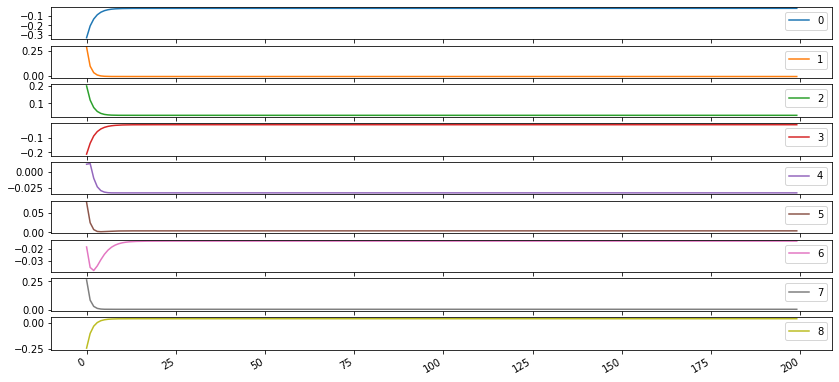

In [140]:
result_vectorized = pd.DataFrame(jts.tensor_to_vector(result_tensor))
result_vectorized.plot(figsize = (14, 7), subplots = True)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

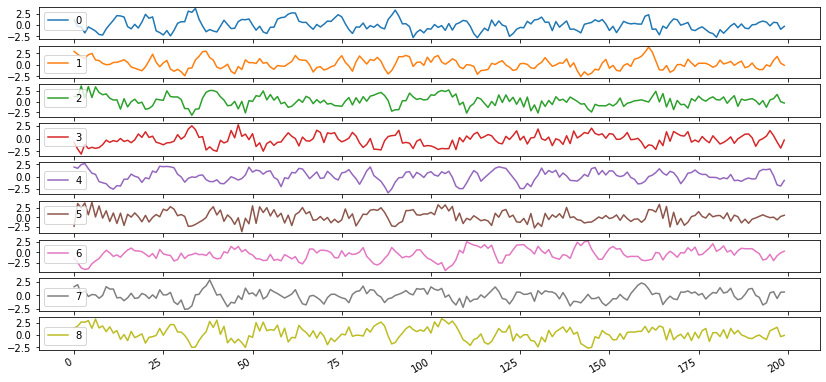

In [141]:
test_vectorized = pd.DataFrame(jts.tensor_to_vector(test_tensor))
test_vectorized.plot(figsize = (14, 7), subplots = True)

In [142]:
error = jts.calc_mape_per_matrix(test_tensor, result_tensor)
error = error.rename(columns={"MAPE": "DFT"})
error

,DFT
0,0.978214
1,0.979051
2,0.988108
3,0.992952
4,0.992384
...,...
195,1.00214
196,0.992174
197,0.988434
198,0.989906


<AxesSubplot:>

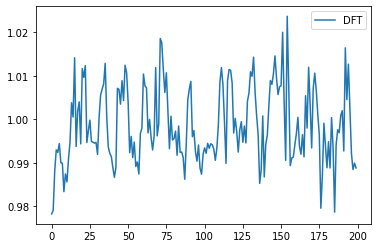

In [143]:
error.plot()

In [144]:
jts.forecast_accuracy(result_vectorized, test_vectorized)

Results
----------------------------------------------------------------------
           ME            MSE            MAE            MAPE
0       0.010          1.602          1.019          99.627%       
1       -0.199         1.293          0.899          100.399%      
2       -0.164         1.577          0.992          97.389%       
3       0.201          1.193          0.877          100.654%      
4       -0.126         1.318          0.926          100.709%      
5       -0.176         2.105          1.149          100.074%      
6       0.421          2.025          1.133          101.478%      
7       0.008          0.960          0.778          100.724%      
8       -0.256         1.776          1.080          103.590%      
